# Imports

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import os, math

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans, KernelKMeans, silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

from collections import Counter
from tqdm import tqdm
import pickle
from scipy import stats

# Loading Data

In [2]:
with open("options.txt", 'r') as f:
    options = f.readlines()
    options = {option.split("=")[0]: option.split("=")[1].strip() for option in options}
print(options)

{'hanoi_scenario_dir': 'C:\\Users\\mjnst\\Desktop\\Thesis\\Hanoi_CMH\\Scenario-1', 'RUG_dir': 'C:\\Users\\mjnst\\Desktop\\Thesis\\RUG_data_5years', 'RUG_raw_csv': 'C:\\Users\\mjnst\\Desktop\\Thesis\\rug_csv.csv', 'RUG_timeseries': 'C:\\Users\\mjnst\\Desktop\\Thesis\\rug_timeseries.pkl', 'RUG_obfuscated': 'C:\\Users\\mjnst\\Desktop\\Thesis\\obfuscated_data.pkl'}


In [3]:
RUG = pd.read_pickle(options['RUG_obfuscated'])

# Preparing and Transforming Data

In [4]:
RUG.interpolate(method='linear', inplace=True, limit=20)

In [5]:
def get_data(col_name, rm_outlier=False):
    df = RUG[col_name].copy()
    # print(df.isna().sum())
    if rm_outlier:
        df[np.abs(stats.zscore(df, nan_policy='omit')) > 5] = np.nan
    # print(df.isna().sum())
    # df.plot(legend=False)
    # plt.show()
    groups = df.groupby(pd.Grouper(freq='D'))

    # get the calender date of the groups
    days = list(groups.first().index.strftime('%Y:%m:%d'))

    gro = [groups.get_group(x).reset_index(drop=True) for x in groups.groups]

    temp = pd.concat(gro, axis=1, keys=days)

    temp.index = pd.date_range("00:00", "23:59", freq="1min").strftime('%H:%M')

    # drop all columns of temp dataframe which contain nan values
    temp.dropna(axis=1, how='any', inplace=True)
    temp  = temp[::10]
    return temp

Location 1 - flow


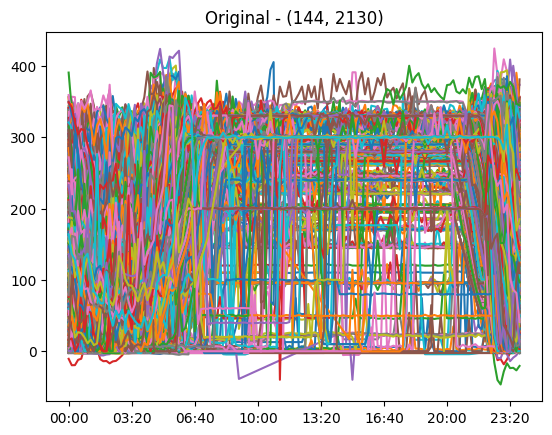

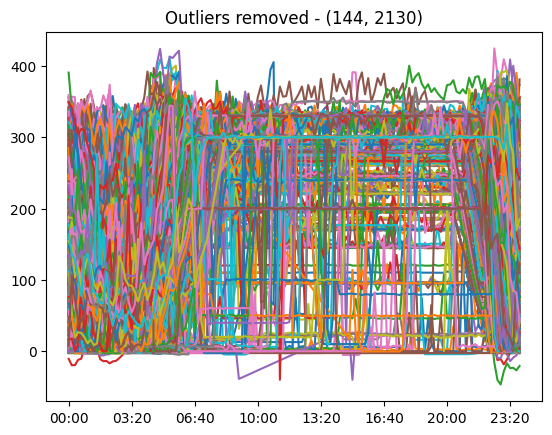

Location 2 - consumption


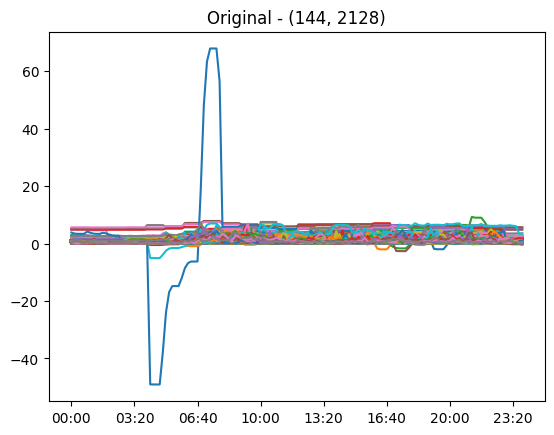

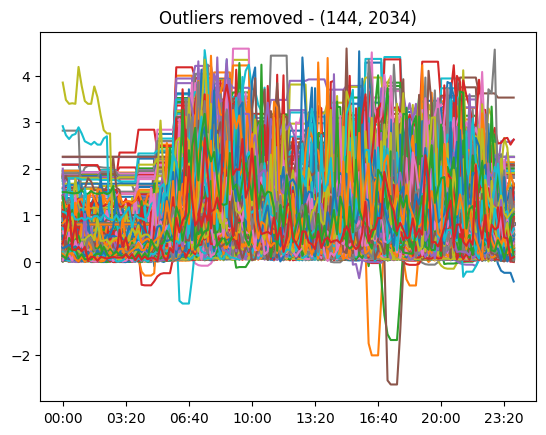

Location 3 - consumption


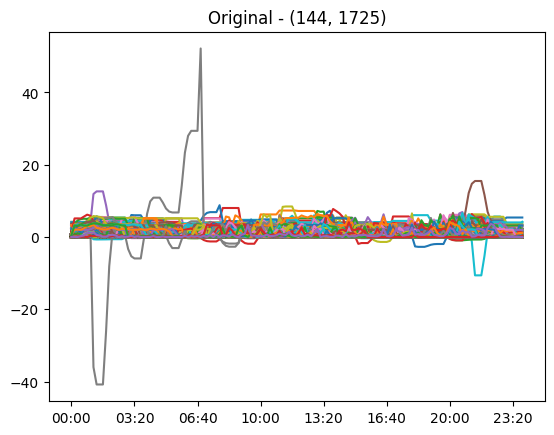

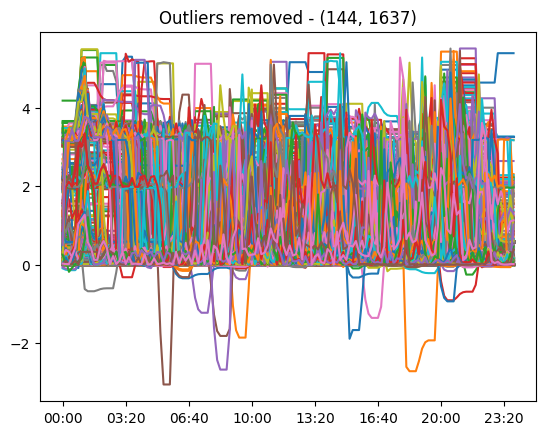

Location 4 - consumption


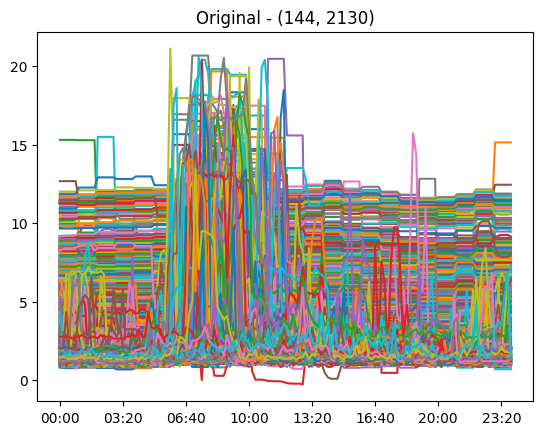

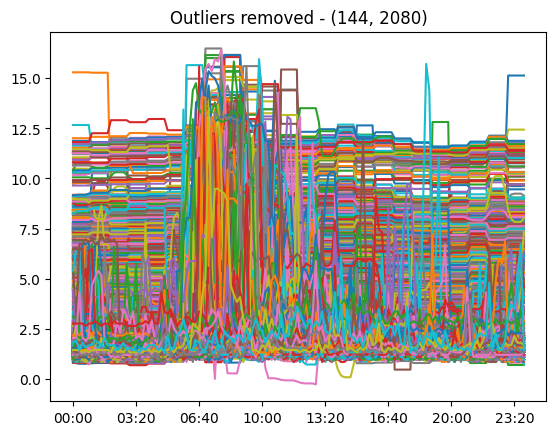

Location 5 - consumption


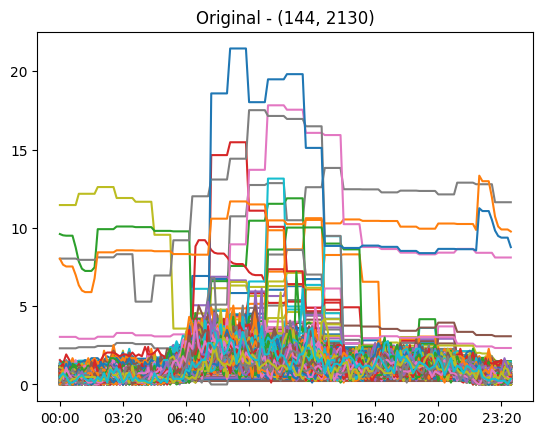

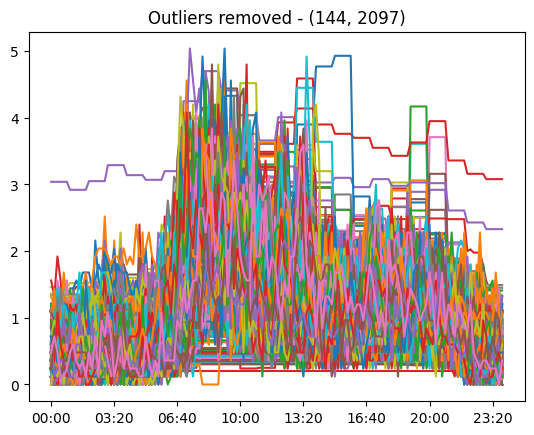

Location 6 - head


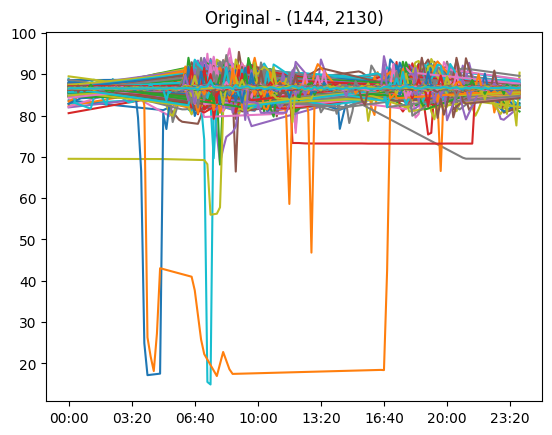

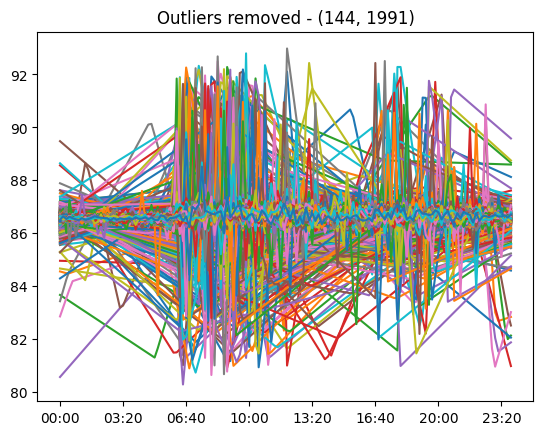

Location 7 - head


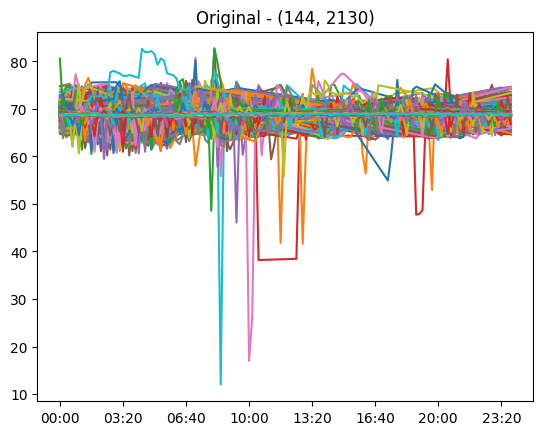

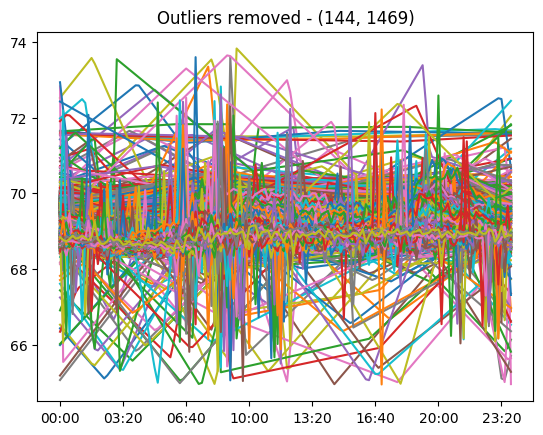

Location 8 - flow


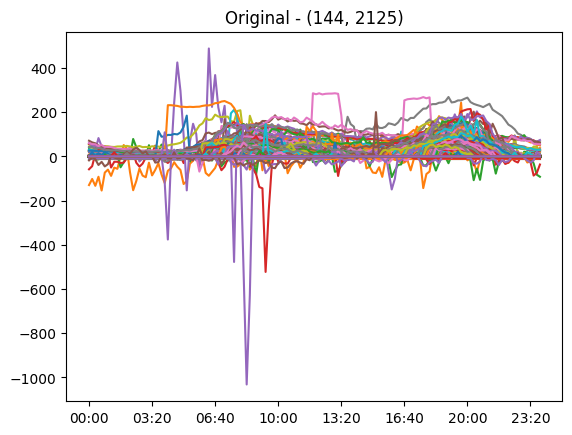

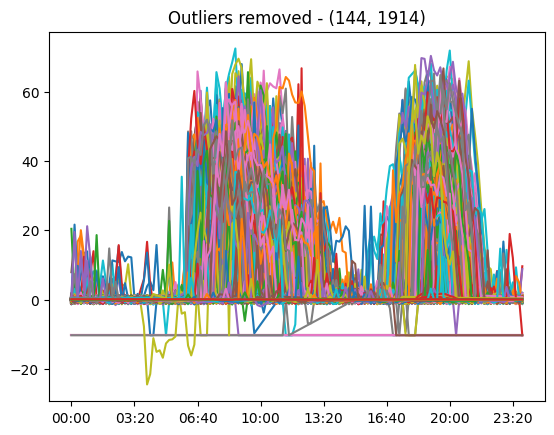

Location 9 - head


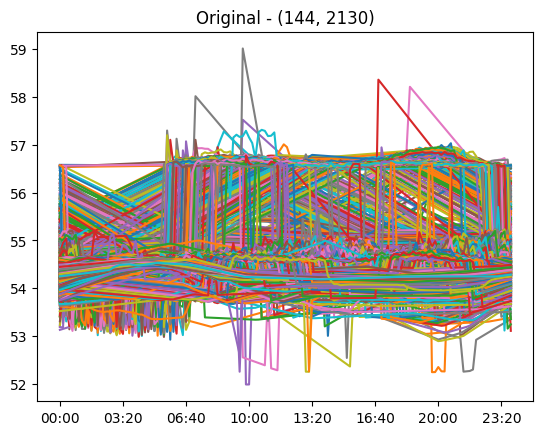

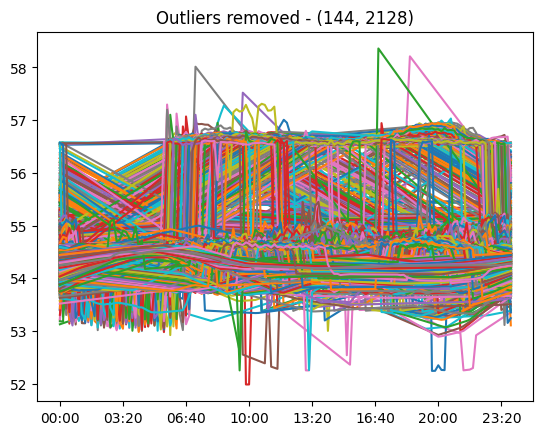

Location 10 - flow


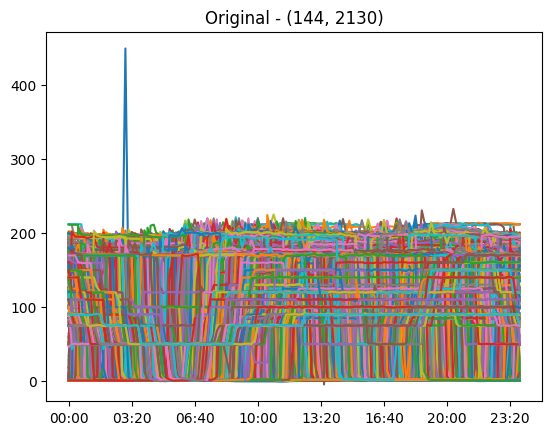

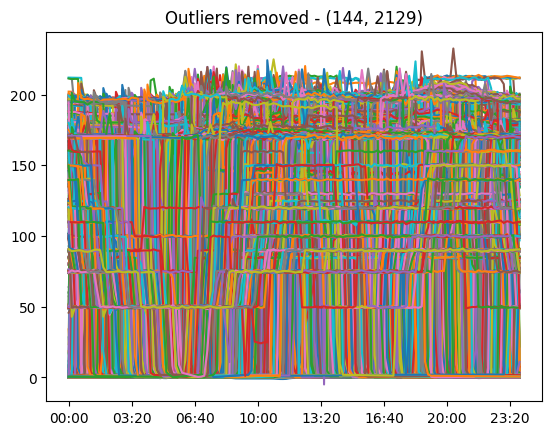

Location 11 - head


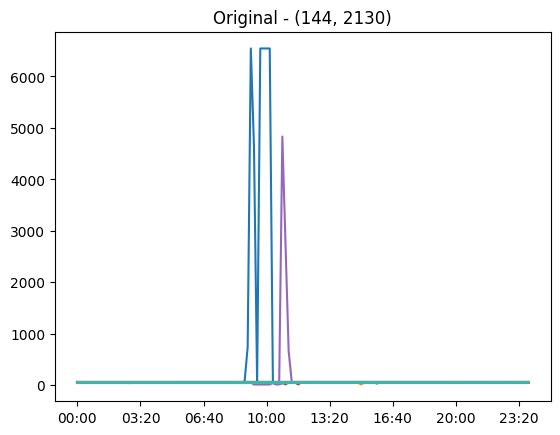

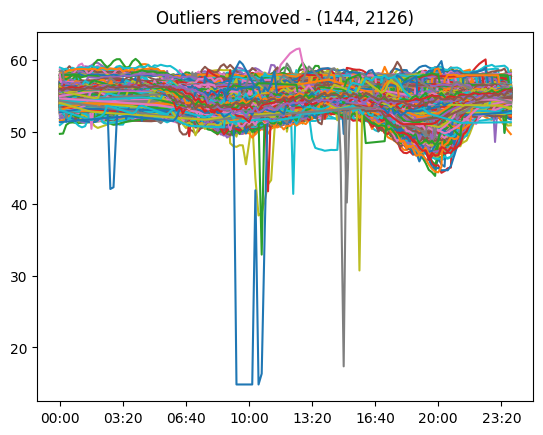

Location 11 - flow


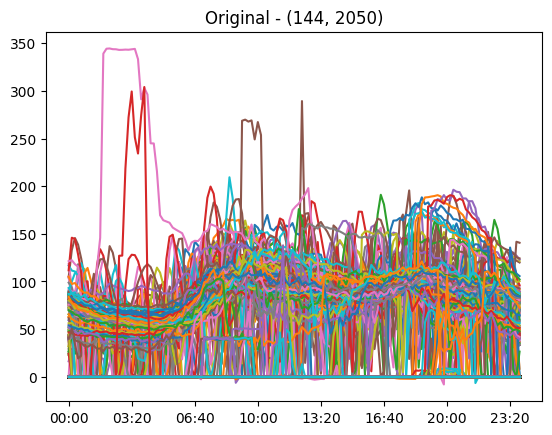

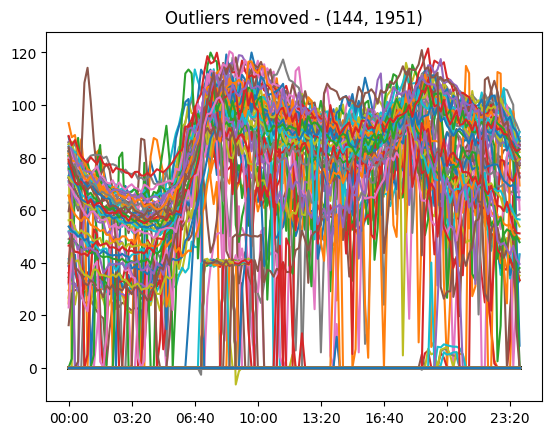

Location 12 - head


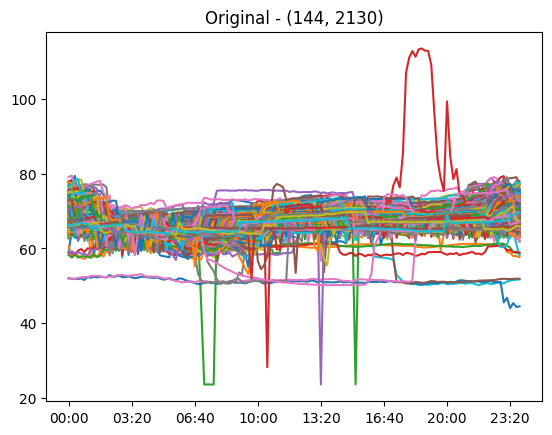

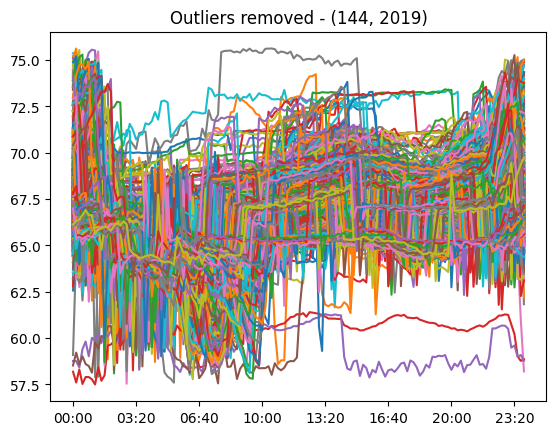

In [10]:
for col in RUG.columns:
    print(col)
    
    df_1 = get_data(col, False)
    df_1.plot(legend=False, title=f"Original - {df_1.shape}")
    plt.show()
    
    df_1 = get_data(col, True)
    df_1.plot(legend=False, title=f"Outliers removed - {df_1.shape}")
    plt.show()